In [1]:
!pip install -U git+https://github.com/dannasalazar11/GMRRNet

  Cloning https://github.com/dannasalazar11/GMRRNet to /tmp/pip-req-build-q0mkn271
  Running command git clone --filter=blob:none --quiet https://github.com/dannasalazar11/GMRRNet /tmp/pip-req-build-q0mkn271
  Resolved https://github.com/dannasalazar11/GMRRNet to commit 2e53e7424787dfd5d8f99ff8242261ecdfb211e1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:0000:0100:01
  Created wheel for gmrrnet: filename=gmrrnet-0.1.0-py3-none-any.whl size=12784 sha256=6e242502c4b4ec0dfa811a797e278ca3276d7b07637489b950b12d55bd636e2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-r8ly3ku1/wheels/39/e7/83/b760465d56e2e705449e46385ee749693c97f3e7990f6628c9
Successfully built gmrrnet
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's d

In [2]:
from gmrrnet.model import GMRRNet

2024-08-19 16:49:50.595520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 16:49:50.595616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 16:49:50.719363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases
!pip install gmrrnet[dev]

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Cloning https://github.com/UN-GCPDS/python-gcpds.databases to /tmp/pip-req-build-1ohkcaw4
  Running command git clone --filter=blob:none --quiet https://github.com/UN-GCPDS/python-gcpds.databases /tmp/pip-req-build-1ohkcaw4
  Resolved https://github.com/UN-GCPDS/python-gcpds.databases to commit c35637e1a19d7cd21656496339c1dedae6714916
  Preparing metadata (setup.py) ... done
  Created wheel for gcpds-databases: filename=gcpds_databases-0.2-py3-none-any.whl size=94504 sha256=8c233c74ebb190de7ce0c8901673bf8cb5854fc5ba0f2151157a636c21ebcf54
  Stored in directory: /tmp/pip-ephem-wheel-cache-agvfpkx6/wheels/8e/66/a7/91b78b1787a3e4d17cb82ea2da67845aa9389012c0ed8280b0
Successfully built gcpds-databases
  Cloning https://github.com/UN-GCPDS/python-gcpds.visualizations.git to /tmp/pip-install-pvpdhroi/gcpds-visualizations_4b72e4b73f8f49d39cfe2a8e75058182
  Running command git clone --filter=blob:none --quiet https://github.com/UN-GCPDS/python-gcpds.visualizations.git /tmp/pip-install-pvpdhroi

In [4]:
from gmrrnet.utils import load_GIGA
from gmrrnet.utils import topoplot
from gmrrnet.utils import plot_circos

In [5]:
import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from gcpds.databases import GIGA_MI_ME
import matplotlib.pyplot as plt

In [6]:
db = GIGA_MI_ME('/kaggle/input/giga-science-gcpds/GIGA_MI_ME')
fs = db.metadata['sampling_rate']
# 64 canales
eeg_ch_names = ['Fp1','Fpz','Fp2',
              'AF7','AF3','AFz','AF4','AF8',
              'F7','F5','F3','F1','Fz','F2','F4','F6','F8',
              'FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8',
              'T7','C5','C3','C1','Cz','C2','C4','C6','T8',
              'TP7','CP5','CP3','CP1','CPz','CP2','CP4','CP6','TP8',
              'P9','P7','P5','P3','P1','Pz','P2','P4','P6','P8','P10',
              'PO7','PO3','POz','PO4','PO8',
              'O1','Oz','O2',
              'Iz']
load_args = dict(db = db,
                 eeg_ch_names = eeg_ch_names,
                 fs = fs,
                 f_bank = np.asarray([[4., 40.]]), # bandpass
                 vwt = np.asarray([[2.5, 5]]),
                 new_fs = 128.)

sbj=14
X, y = load_GIGA(sbj=sbj, **load_args)
encoder = OneHotEncoder(sparse_output=True)
y = encoder.fit_transform(y.reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Resampling from 512.000000 to 128.000000 Hz.


In [7]:
model = GMRRNet()

history = model.fit(X_train,y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150


I0000 00:00:1724086250.810137     240 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 8s 91ms/step - loss: 0.5560 - out_activation_loss: 0.4869 - concatenated_entropies_loss: 0.8325 - out_activation_binary_accuracy: 0.4938
Epoch 2/150
5/5 [==============================] - 0s 87ms/step - loss: 0.5182 - out_activation_loss: 0.4396 - concatenated_entropies_loss: 0.8326 - out_activation_binary_accuracy: 0.5688
Epoch 3/150
5/5 [==============================] - 0s 87ms/step - loss: 0.4471 - out_activation_loss: 0.3507 - concatenated_entropies_loss: 0.8327 - out_activation_binary_accuracy: 0.9563
Epoch 4/150
5/5 [==============================] - 0s 87ms/step - loss: 0.3715 - out_activation_loss: 0.2563 - concatenated_entropies_loss: 0.8323 - out_activation_binary_accuracy: 0.9500
Epoch 5/150
5/5 [==============================] - 0s 90ms/step - loss: 0.3121 - out_activation_loss: 0.1823 - concatenated_entropies_loss: 0.8315 - out_activation_binary_accuracy: 0.9688
Epoch 6/150
5/5 [==============================] - 0s 88ms/step - loss: 

In [8]:
y_pred = model.predict(X_test)[0]

2/2 [==============================] - 1s 104ms/step


In [9]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

1.0

In [10]:
kernel1 = tf.keras.Model(inputs=model.inputs,outputs=model.get_layer('gaussian_layer_1').output) 
kernel2 = tf.keras.Model(inputs=model.inputs,outputs=model.get_layer('gaussian_layer_2').output) 
kernel3 = tf.keras.Model(inputs=model.inputs,outputs=model.get_layer('gaussian_layer_3').output)

idx_left = tf.squeeze(tf.where(np.argmax(y_train, axis=1)==0))
idx_right = tf.squeeze(tf.where(np.argmax(y_train, axis=1)==1))

### kernel 1
X_k1 = kernel1.predict(tf.expand_dims(X_train[0], axis=0))
X_k1 = tf.reduce_mean(X_k1, axis=-1) # promedio por filtros

X_k1_left = tf.reduce_mean(tf.gather(X_k1, idx_left), axis=0) # promedio de clase izq
X_k1_right = tf.reduce_mean(tf.gather(X_k1, idx_right), axis=0) # promedio de clase der

### Kernel 2
X_k2 = kernel2.predict(X_train)
X_k2 = tf.reduce_mean(X_k2, axis=-1) # promedio por filtros

X_k2_left = tf.reduce_mean(tf.gather(X_k2, idx_left), axis=0) # promedio de clase izq
X_k2_right = tf.reduce_mean(tf.gather(X_k2, idx_right), axis=0) # promedio de clase der

### Kernel 3
X_k3 = kernel3.predict(X_train)
X_k3 = tf.reduce_mean(X_k3, axis=-1) # promedio por filtros

X_k3_left = tf.reduce_mean(tf.gather(X_k3, idx_left), axis=0) # promedio de clase izq
X_k3_right = tf.reduce_mean(tf.gather(X_k3, idx_right), axis=0) # promedio de clase der

5/5 [==============================] - 0s 7ms/step


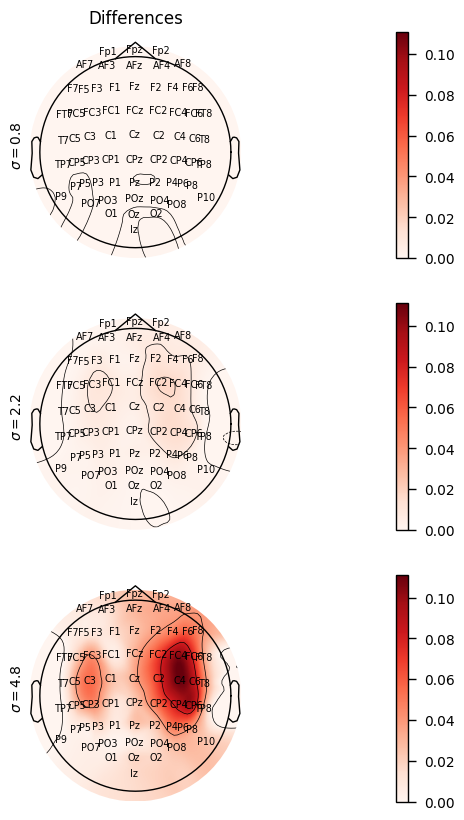

In [11]:
fig, axs = plt.subplots(3,1,figsize=[40,10])

axs[0].set_title("Differences")

axs[0].set_ylabel("$\sigma=0.8$")
axs[1].set_ylabel("$\sigma=2.2$")
axs[2].set_ylabel("$\sigma=4.8$")

# diferencias
diferencia1 = tf.abs(tf.subtract(tf.reduce_mean(X_k1_left,axis=0).numpy() , tf.reduce_mean(X_k1_right,axis=0).numpy()))
diferencia2 = tf.abs(tf.subtract(tf.reduce_mean(X_k2_left,axis=0).numpy() , tf.reduce_mean(X_k2_right,axis=0).numpy()))
diferencia3 = tf.abs(tf.subtract(tf.reduce_mean(X_k3_left,axis=0).numpy() , tf.reduce_mean(X_k3_right,axis=0).numpy()))
max_dif = tf.reduce_max(tf.stack([diferencia1, diferencia2, diferencia3]))

vmax = tf.reduce_max(tf.stack([tf.reduce_mean(X_k1_left,axis=0),tf.reduce_mean(X_k1_right,axis=0),tf.reduce_mean(X_k2_left,axis=0),tf.reduce_mean(X_k2_right,axis=0),tf.reduce_mean(X_k3_left,axis=0),tf.reduce_mean(X_k3_right,axis=0)], axis=0)) 

topoplot(diferencia1, eeg_ch_names, contours=3, names=eeg_ch_names, sensors=False, ax= axs[0], vlim=(0,max_dif))
topoplot(diferencia2, eeg_ch_names, contours=3, names=eeg_ch_names, sensors=False, ax=axs[1], vlim=(0,max_dif))
topoplot(diferencia3, eeg_ch_names, contours=3, names=eeg_ch_names, sensors=False, ax=axs[2], vlim=(0,max_dif))

plt.savefig('heads_43.pdf', bbox_inches='tight')
plt.show()

In [12]:
areas = {
    'Frontal': ['Fpz', 'AFz', 'Fz', 'FCz'],
    'Frontal Right': ['Fp2','AF4','AF8','F2','F4','F6','F8',],
    'Central Right': ['FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8',],
    'Posterior Right': ['P2','P4','P6','P8','P10','PO4','PO8','O2',],
    #'Central': ['Cz'],
    'Posterior': ['CPz','Pz', 'Cz','POz','Oz','Iz',],
    'Posterior Left': ['P1','P3','P5','P7','P9','PO3','PO7','O1',],
    'Central Left': ['FC1','FC3','FC5','FT7','C1','C3','C5','T7','CP1','CP3','CP5','TP7',],
    'Frontal Left': ['Fp1','AF3','AF7','F1','F3','F5','F7',],
}

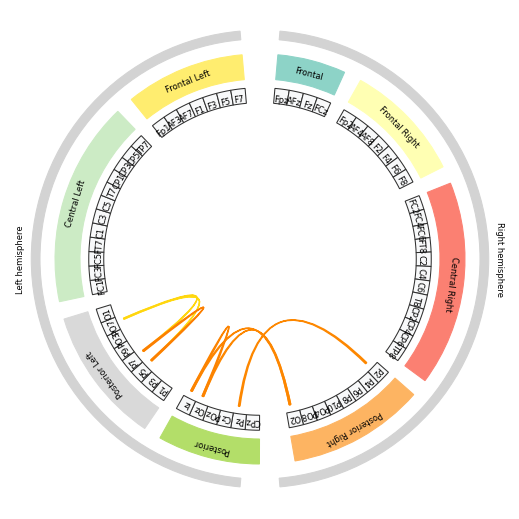

In [13]:
plot_circos(X_k2_left, eeg_ch_names, areas, threshold=0.75)